In [1]:
# Python SQL toolkit and Object Relational Mapper
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# REFLECT TABLES INTO SQLALCHEMY ORM

In [5]:
# Python SQL toolkit and Object Relational Mappe
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# EXPLORATORY CLIMATE ANALYSIS

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date.between('2017-01-09','2018-01-09')).\
    order_by(Measurement.date).all()

# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

recent_dt = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_dt)

last_dt = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_dt)

Year_prec_data = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date > last_dt).\
                    order_by(Measurement.date).all()

Year_prec_data

('2017-08-23',)
2016-08-23


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

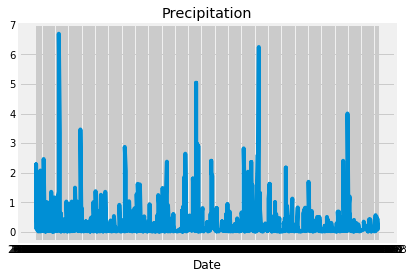

<Figure size 432x288 with 0 Axes>

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(Year_prec_data, columns=['date', 'rain'])

rain_df = rain_df.dropna().set_index('date')
rain_df = rain_df.loc[rain_df["rain"]>0,:]

# Sort the dataframe by date
rain_df = rain_df.sort_values('date')
rain_df.head()

plt.plot(rain_df)

plt.title('Precipitation')
plt.xlabel('Date')

# fig.autofmt_xdate()
plt.show()

plt.savefig("Hawaii_rain.png")

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = rain_df.describe()
summary_stats

,rain
count,1142.000000
mean,0.311357
std,0.576134
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(func.count(func.distinct(Measurement.station))).all()
count_stations[0]

(9)

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active = session.query(Measurement.station,Measurement.tobs)
active_df = pd.DataFrame(active[:], columns=["Stations", "TOBS"])
top_active = active_df.groupby("Stations").count().sort_values('TOBS', ascending=False)
top_active

,TOBS
Stations,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active=active_df.loc[active_df['Stations']==top_active.index[0]]
#most_active

result = [most_active["TOBS"].min(), most_active["TOBS"].max(),\
          most_active["TOBS"].mean()]
print(result)

[54.0, 85.0, 71.66378066378067]


Text(0, 0.5, 'Frequency')

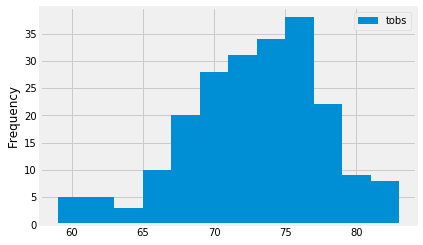

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

max_temp = top_active.index[0]
max_temp
maxx = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date.between('2017-01-09','2018-01-09')).\
    filter(Measurement.station==max_temp).\
    order_by(Measurement.date).all()

# df3 = pd.DataFrame(mas[:],columns=['TOBS','Recorded Temperature'])
max_df = pd.DataFrame(maxx)
max_df.plot.hist(bins=12)
plt.ylabel('Frequency')
# Sort the dataframe by date
# df3.set_index('Recorded Temperature',inplace=True)
# df3
# Use Pandas Plotting with Matplotlib to plot the data

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-01-09','2018-01-09'))

[(58.0, 74.34814814814816, 87.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

prev_year = calc_temps('2016-01-09','2017-01-09')
prev_year

[(56.0, 74.09330453563715, 84.0)]